In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RESULTS_PATH = "results"
df = None

for path in os.listdir(RESULTS_PATH):
    if "optuna" in path:
        continue
    tmp = pd.read_csv(os.path.join(RESULTS_PATH, path))
    if "type" in tmp.columns:
        tmp["dataset"] = tmp["type"]
        tmp = tmp.drop("type", axis=1)
    df = tmp if df is None else pd.concat([df, tmp])
df.reset_index(inplace=True, drop=True)

In [3]:
print("Shape: ", df.shape)
df.head()

Shape:  (38, 6)


,balanced_accuracy,f1_score,precision,recall,model,dataset
0,0.803373,0.800792,0.812048,0.789844,WordGRU,simple
1,0.813125,0.815586,0.805640,0.825781,WordGRU,lemmatized
2,0.824037,0.833703,0.791024,0.881250,WordGRU,stemmed
3,0.831058,0.843251,0.787263,0.907813,SVC,lemmatization
4,0.828714,0.840727,0.786395,0.903125,SVC,preprocessed


In [5]:
_mapper = {
    "lemmatization": "lemmatized",
    "stemming": "stemmed",
    "preprocessed": "simple",
}
df["dataset"] = df["dataset"].apply(lambda x: _mapper[x] if x in _mapper else x)

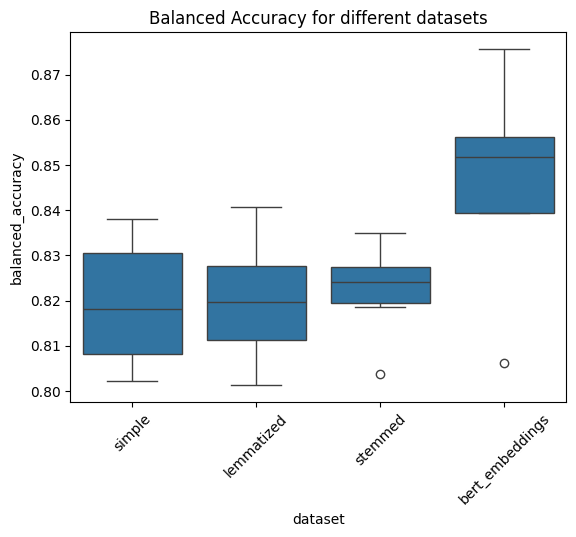

In [6]:
ax = plt.gca()
sns.boxplot(x="dataset", y="balanced_accuracy", data=df)
ax.set_title("Balanced Accuracy for different datasets")
# rotate x axis labels
for item in ax.get_xticklabels():
    item.set_rotation(45)

In [7]:
models_order = [
    "RF",
    "LR",
    "SVC",
    "LGBM",
    "XGB",
    "WordGRU",
    "WordCNN",
    "WordCNN+GRU",
    "CharGRU",
    "CharCNN",
    "CharCNN+GRU",
]

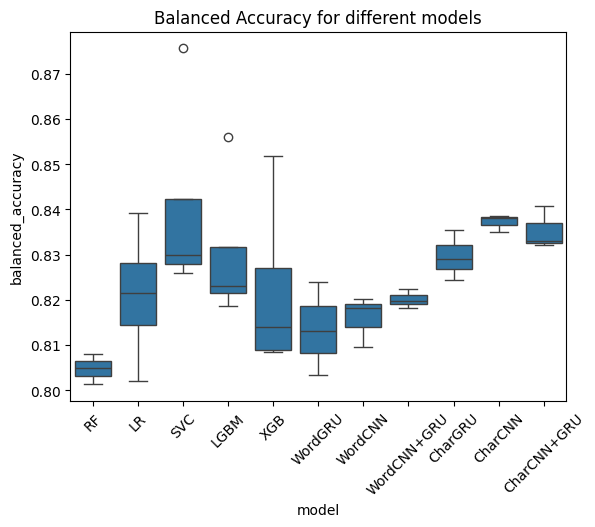

In [8]:
ax = plt.gca()
sns.boxplot(x="model", y="balanced_accuracy", data=df, order=models_order)
ax.set_title("Balanced Accuracy for different models")
# rotate x axis labels
for item in ax.get_xticklabels():
    item.set_rotation(45)

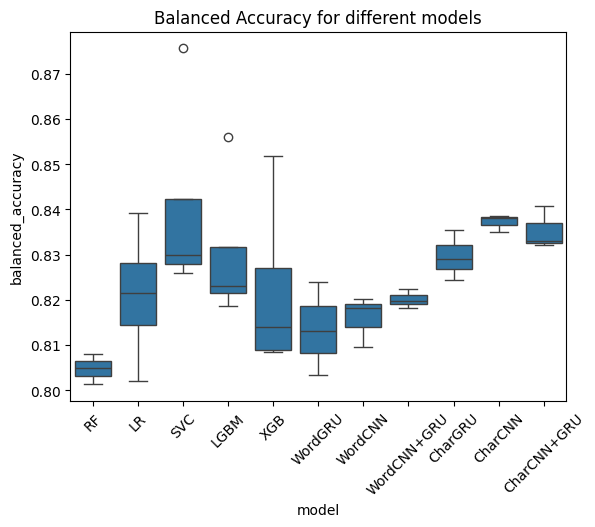

In [9]:
ax = plt.gca()
sns.boxplot(x="model", y="balanced_accuracy", data=df, order=models_order)
ax.set_title("Balanced Accuracy for different models")
# rotate x axis labels
for item in ax.get_xticklabels():
    item.set_rotation(45)

In [11]:
df.sort_values(by="balanced_accuracy", ascending=False).head(10)

,balanced_accuracy,f1_score,precision,recall,model,dataset
21,0.875681,0.876265,0.872868,0.879687,SVC,bert_embeddings
22,0.856122,0.859004,0.842857,0.875781,LGBM,bert_embeddings
23,0.851823,0.854622,0.839488,0.870313,XGB,bert_embeddings
27,0.840834,0.851838,0.797546,0.914062,CharCNN+GRU,lemmatized
24,0.839317,0.841618,0.830418,0.853125,LR,bert_embeddings
33,0.838513,0.845144,0.812545,0.880469,CharCNN,lemmatized
32,0.838130,0.843182,0.818382,0.869531,CharCNN,simple
35,0.835386,0.842026,0.810108,0.876563,CharGRU,simple
34,0.835016,0.837442,0.825988,0.849219,CharCNN,stemmed
28,0.833017,0.844217,0.791923,0.903906,CharCNN+GRU,stemmed
